#Importing Modules

In [1]:
!pip install resampy
import os
import pandas as pd
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from zipfile import ZipFile
import shutil
from google.colab import drive
import librosa
import librosa.display
import IPython.display as ipd
import resampy

#Mounting the G-Drive with the audio files in zip form

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Unzipping the file and saving them in a single folder named all_files

In [4]:
file1 = "/content/drive/MyDrive/archive.zip"
file2 = "/content/drive/MyDrive/archive2.zip"

temp_folder1 = "/content/temp1/"
temp_folder2 = "/content/temp2/"


d_folder = "/content/all_files/"

os.makedirs(temp_folder1, exist_ok=True)
os.makedirs(temp_folder2, exist_ok=True)
os.makedirs(d_folder, exist_ok=True)

with zipfile.ZipFile(file1, 'r') as zip_ref:
    zip_ref.extractall(temp_folder1)

with zipfile.ZipFile(file2, 'r') as zip_ref:
    zip_ref.extractall(temp_folder2)

for root, dirs, files in os.walk(temp_folder1):
    for file in files:
        file_path = os.path.join(root, file)
        shutil.move(file_path, os.path.join(d_folder, file))

for root, dirs, files in os.walk(temp_folder2):
    for file in files:
        file_path = os.path.join(root, file)
        shutil.move(file_path, os.path.join(d_folder, file))

print("All files have been consolidated into:", d_folder)


All files have been consolidated into: /content/all_files/


#Taking all file_path names into a list named file_path

In [34]:
folderpath = "/content/all_files"
file_path = os.listdir(folderpath)
label = ["Anger", "Disgust","Fear","Happy","Neutral","Sad"]

##Using os.path.join to create correct file paths

In [36]:
# Fix:
for i in range(len(file_path)):
  file_path[i] = os.path.join("/content/all_files/", file_path[i])

##Appending the emotion of the sound and its label into two different list l and p

In [40]:
l=[]
p=[]
for j in file_path:

    for i in range(len(j)-3):
        if j[i:i+3] == "SAD":
            l.append(label[5])
            p.append(5)
        elif j[i:i+3] == "HAP":
            l.append(label[3])
            p.append(3)
        elif j[i:i+3] == "ANG":
            l.append(label[0])
            p.append(0)
        elif j[i:i+3] == "NEU":
            l.append(label[4])
            p.append(4)
        elif j[i:i+3] == "DIS":
            l.append(label[1])
            p.append(1)
        elif j[i:i+3] == "FEA":
            l.append(label[2])
            p.append(2)

    if j[26] == '1':
        l.append(label[4])
        p.append(4)
    elif j[26] == '2':
        l.append('calm')
        p.append(6)
    elif j[26] == '3':
        l.append(label[3])
        p.append(3)
    elif j[26] == '4':
        l.append(label[5])
        p.append(5)
    elif j[26] == '5':
        l.append(label[0])
        p.append(0)
    elif j[26] == '6':
        l.append(label[2])
        p.append(2)
    elif j[26] == '7':
        l.append(label[1])
        p.append(1)
    elif j[26] == '8':
        l.append("Surprised")
        p.append(7)


##Preparing the dataframe which stores the features and the labels

In [42]:
df = pd.DataFrame({"relative_path": file_path,"class": l, "class_ID": p})

In [43]:
## check whether the dataset is imbalanced
df["class_ID"].value_counts()

,count
class_ID,
5,1463
0,1463
2,1463
1,1463
3,1463
4,1183
6,192
7,192


##sample audio play and display using librosa

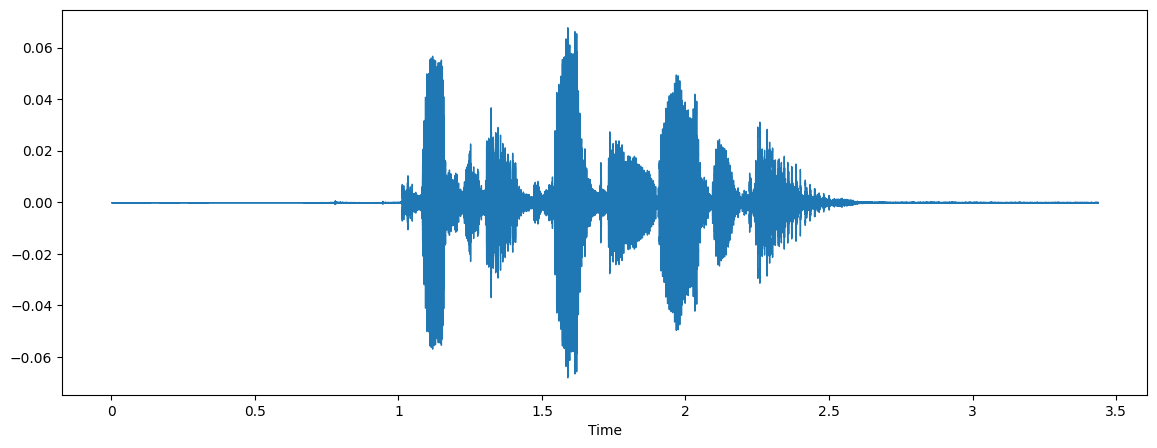

In [44]:
import librosa
import IPython.display as ipd
plt.figure(figsize=(14,5))
sig, sr= librosa.load("/content/all_files/03-01-01-01-01-01-03.wav")
librosa.display.waveshow(sig, sr=sr)
ipd.Audio("/content/all_files/03-01-01-01-01-01-03.wav")

##Ploting a sample spectrogram of a random audio from the dataset

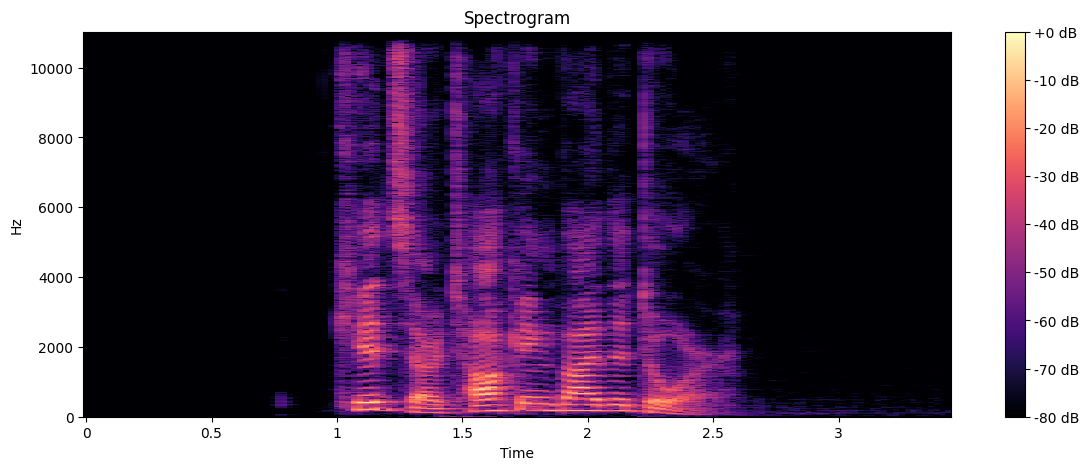

In [70]:
sig, sr = librosa.load("/content/all_files/03-01-01-01-01-01-03.wav")
D = librosa.stft(sig)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

##Extracting and showing the featutes of the sample audio

In [45]:
mfccs = librosa.feature.mfcc(y= sig, sr= sr, n_mfcc=40)
print(mfccs.shape)

(40, 149)


In [46]:
mfccs

array([[-7.7475879e+02, -7.7475879e+02, -7.7475879e+02, ...,
        -7.6035370e+02, -7.6290985e+02, -7.6798718e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.8905020e+01,  1.5812819e+01,  9.3337784e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.5158231e+01,  1.3377800e+01,  8.6708794e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.0715681e-01, -1.2212108e+00, -9.7979641e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         5.5854499e-02, -3.3687186e-01, -5.8756357e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -3.0106366e-02,  2.7038378e-01, -2.8224015e-01]], dtype=float32)

##Defining a function named feature_extract that extracts the essential features of the audip

In [47]:
def feature_extract(file):
  audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

  return mfccs_scaled_features

##Extracting features of all the audio and appending it into a list

In [49]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
  file_name = os.path.join(os.path.abspath(folderpath),str(row["relative_path"]))
  final_class_labels=row["class_ID"]
  data= feature_extract(file_name)
  extracted_features.append([data,final_class_labels])

8882it [07:13, 20.51it/s]


##preparing the dataframe of the features and their respective classes

In [50]:
extracted_features_df = pd.DataFrame(extracted_features, columns = ["feature", "class"])
extracted_features_df.head()

,feature,class
0,"[-420.78003, 159.22481, -0.09381252, 57.118458...",5
1,"[-494.6778, 34.3099, -8.846995, 6.576975, -12....",0
2,"[-342.85696, 116.77801, -9.257745, 56.4794, -9...",0
3,"[-777.3847, 74.4402, 9.929924, 30.088736, 1.49...",6
4,"[-370.17624, 119.62818, 1.2273431, 58.347244, ...",0


In [51]:
X = np.array(extracted_features_df["feature"].tolist())
y = np.array(extracted_features_df["class"].tolist())

In [52]:
X.shape

(8882, 40)

In [53]:
y= np.array(pd.get_dummies(y))

In [54]:
y.shape

(8882, 8)

Splitting the data into training and testing data using train_test_split method

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

@@Normalising the Input data

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Improting essential libraries for the model

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
optimizer = Adam(learning_rate=0.001)

In [63]:
#no. of classes
num_labels= y.shape[1]

##preparing the model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Dense(128, input_shape=(40,), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


##Summary of the model

In [65]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,064 (551.03 KB)

 Trainable params: 139,528 (545.03 KB)

 Non-trainable params: 1,536 (6.00 KB)

##Compiling the model

In [66]:
model.compile(loss= 'categorical_crossentropy', metrics=["accuracy"],optimizer='adam')

##Training the model and calculating the time required for training

In [67]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime
num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath= "/content/best_model.keras", verbose = 1, save_best_only= True)

start = datetime.now()

model.fit(X_train, y_train, batch_size= num_batch_size, epochs= num_epochs, validation_data = (X_test, y_test), callbacks= [checkpointer])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1731 - loss: 9.1562
Epoch 1: val_loss improved from inf to 7.06607, saving model to /content/best_model.keras
223/223 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.1732 - loss: 9.1537 - val_accuracy: 0.3225 - val_loss: 7.0661
Epoch 2/100
213/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2391 - loss: 7.1637
Epoch 2: val_loss improved from 7.06607 to 5.71027, saving model to /content/best_model.keras
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2397 - loss: 7.1432 - val_accuracy: 0.3343 - val_loss: 5.7103
Epoch 3/100
221/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2866 - loss: 5.6184
Epoch 3: val_loss improved from 5.71027 to 4.55155, saving model to /content/best_model.keras
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2866 - loss: 5.6143 - val_accuracy: 0.3590 - val_loss: 4.5516
Epoch 4/100
218/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3092 - loss: 4.4530
Epoch 4: val_loss im

##Accuracy of the model on test data

In [68]:
test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.4400675296783447
